In [8]:
import os
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  

In [9]:
def do_plot(path):
    dt = pd.read_csv("/mnt/stripe/bio/experiments/chip-seq-fc-gsea/" + path + "_values.tsv", comment="#", sep="\t")
    
    n = len(dt)
    inPathway = dt['inPathway']
    k = sum(inPathway)
    
    print("Median : {}".format(np.mean(dt['logFcValue'].values)))
    
    lfc = np.abs(dt['logFcValue'].values)
    
    lfc_sum = np.sum(lfc[np.where(inPathway == 1)])
        
    es1 = np.zeros(n)
    s = 0
    
    for i in range(n):
        if inPathway[i] == 1:
            s += lfc[i] / lfc_sum
        else:
            s -= 1.0 / (n - k)
        es1[i] = s
    
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15,6), gridspec_kw = {'height_ratios':[5, 1]})
    fig.subplots_adjust(hspace=0)
    
    axs[0].plot(es1)
    axs[0].axhline(y=0, color='k')
    axs[0].margins(0.0)

    axs[1].get_yaxis().set_visible(False)
    for i, v in enumerate(inPathway):
        if inPathway[i] == 1:
            axs[1].axvline(i, color='black', alpha=0.5)
            
    plt.show()

In [11]:
def plot_matrix(path):
    dt = pd.read_csv("/mnt/stripe/bio/experiments/chip-seq-fc-gsea/" + path, comment="#", sep="\t")

    columns = list(dt)[5:]
    
    yd = [c for c in columns if c.startswith("YD")]
    od = [c for c in columns if c.startswith("OD")]

    values = dt[yd + od].values
    
    for row in range(values.shape[0]):    
        c = values[row, :]
        c = (c - np.mean(c)) 
        c = c / max(abs(np.min(c)), np.max(c))
        values[row, :] = c
    
    plt.figure(figsize=(8, values.shape[0] / 5))

    img = plt.imshow(values)
    img.set_cmap('seismic')
    
    plt.yticks(range(values.shape[0]), dt["gene"])
    
    plt.axvline(len(yd) - 0.5, color='black')
    
    plt.show()

In [12]:
def find_pathways(p):
    result = [] 
    for f in os.listdir("/mnt/stripe/bio/experiments/chip-seq-fc-gsea/" + p):
        if f.endswith("_values.tsv"):
            result.append(f[:-11])
    return result


R-HSA-2173782
Median : -0.14198792553965972


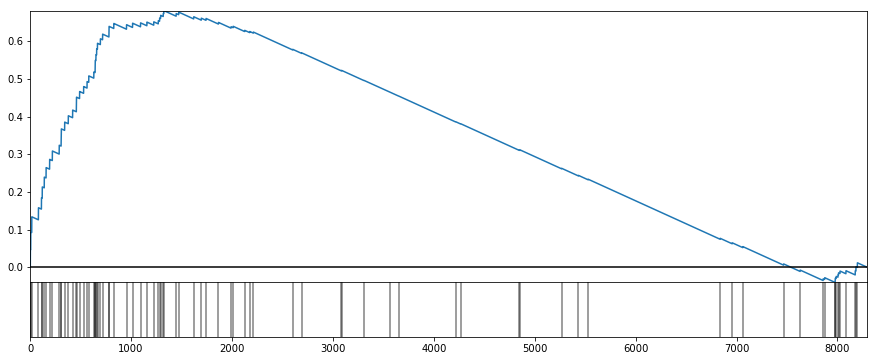

R-HSA-5690714
Median : -0.14198792553965972


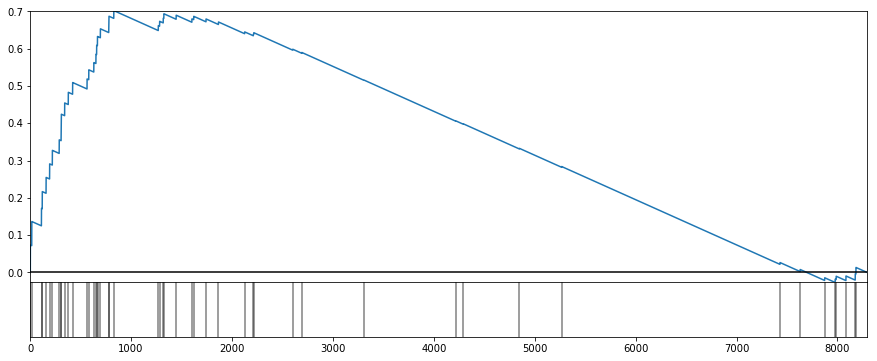

R-HSA-202733
Median : -0.14198792553965972


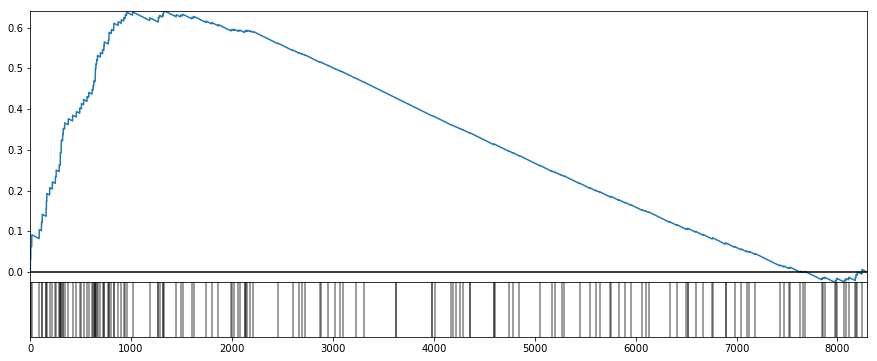

R-HSA-373080
Median : -0.14198792553965972


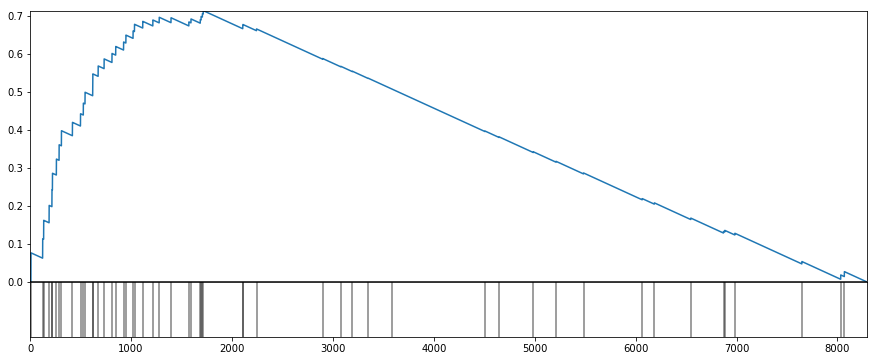

R-HSA-173623
Median : -0.14198792553965972


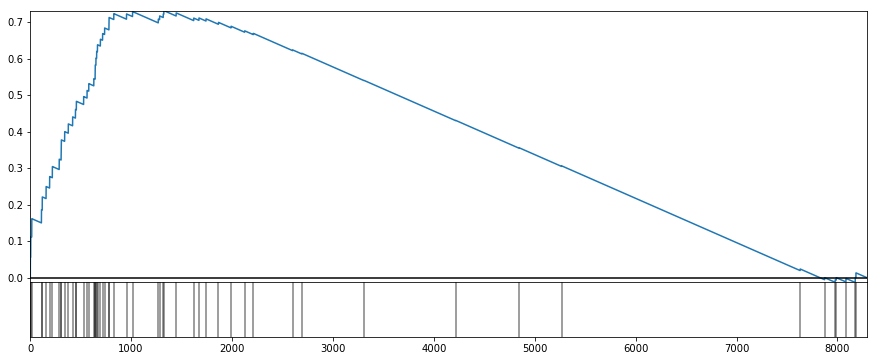

R-HSA-166658
Median : -0.14198792553965972


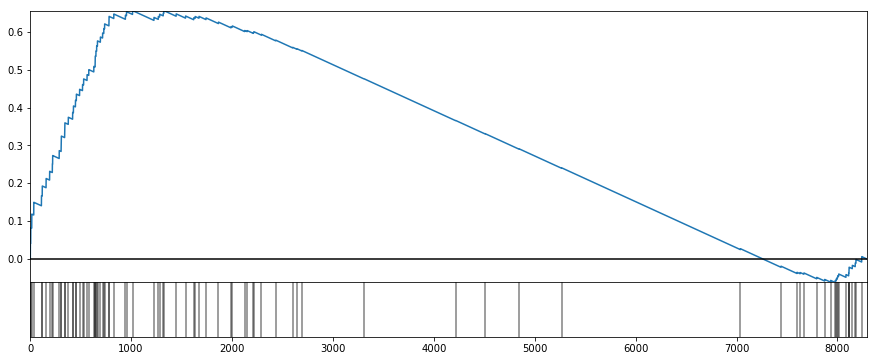

R-HSA-166786
Median : -0.14198792553965972


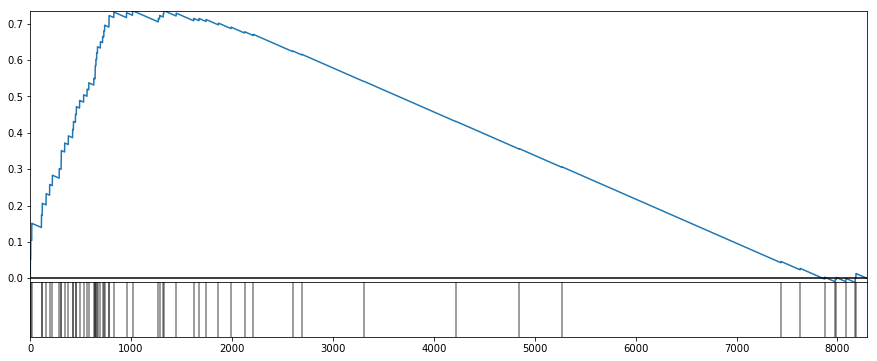

R-HSA-2871809
Median : -0.14198792553965972


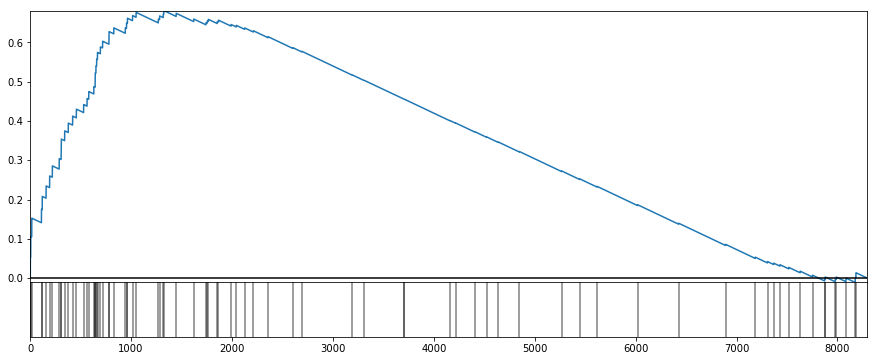

R-HSA-2871796
Median : -0.14198792553965972


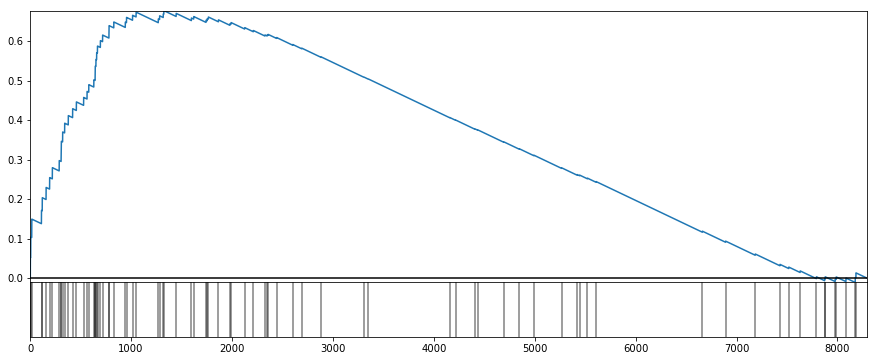

R-HSA-2871837
Median : -0.14198792553965972


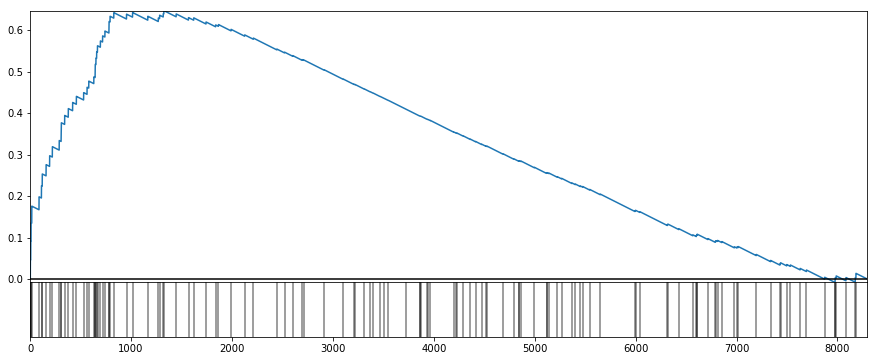

R-HSA-2029481
Median : -0.14198792553965972


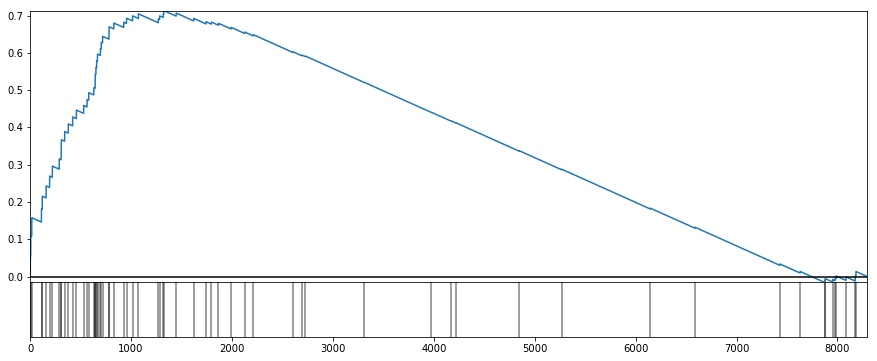

R-HSA-2454202
Median : -0.14198792553965972


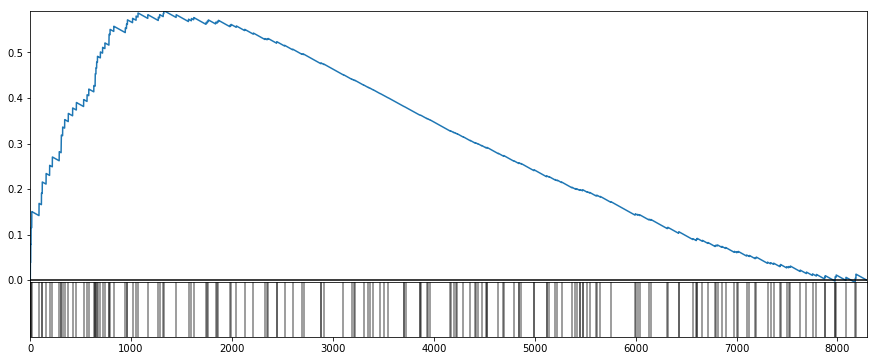

R-HSA-2029480
Median : -0.14198792553965972


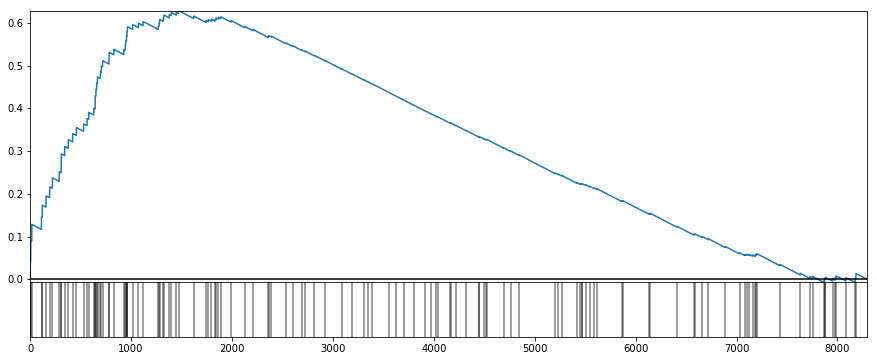

R-HSA-198933
Median : -0.14198792553965972


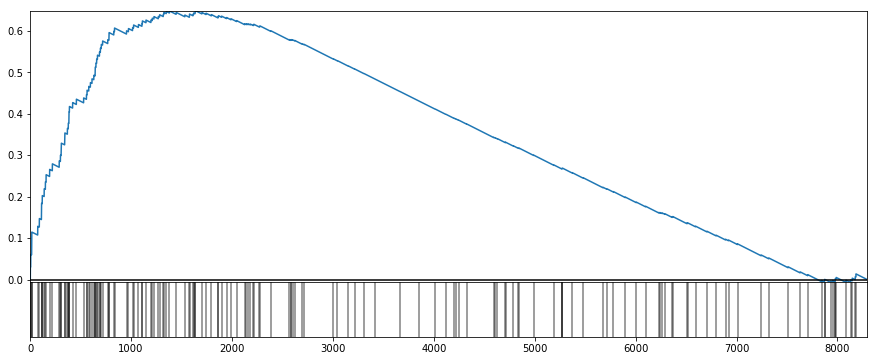

R-HSA-166663
Median : -0.14198792553965972


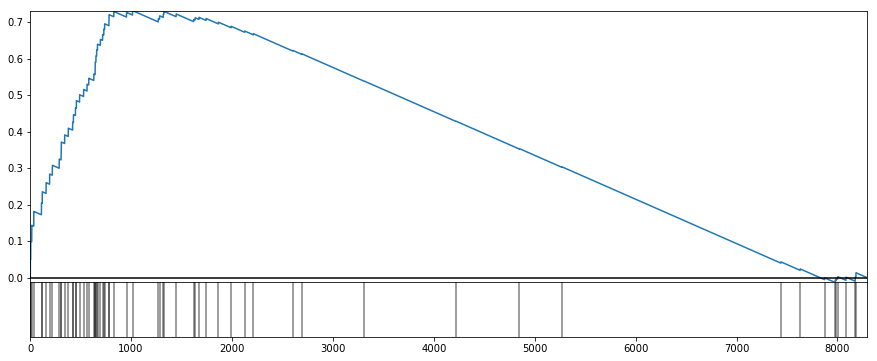

R-HSA-6805567
Median : -0.14198792553965972


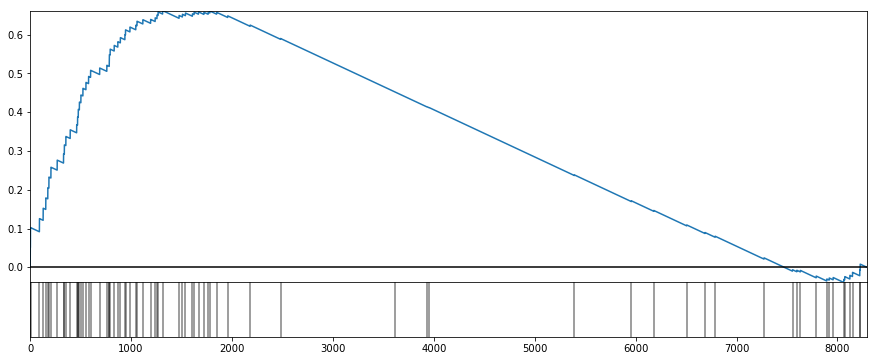

R-HSA-112316
Median : -0.14198792553965972


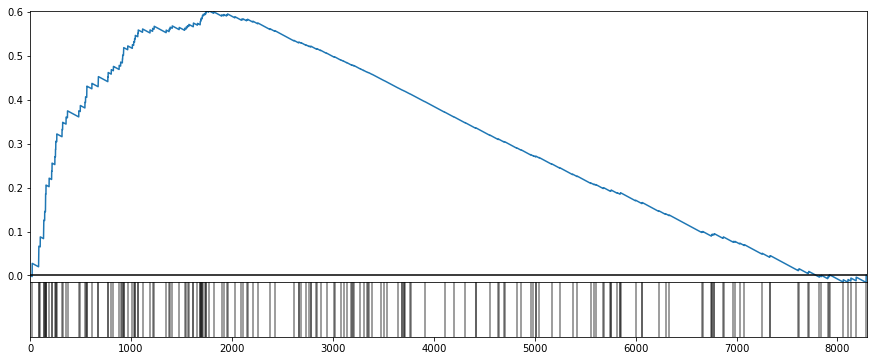

R-HSA-2029482
Median : -0.14198792553965972


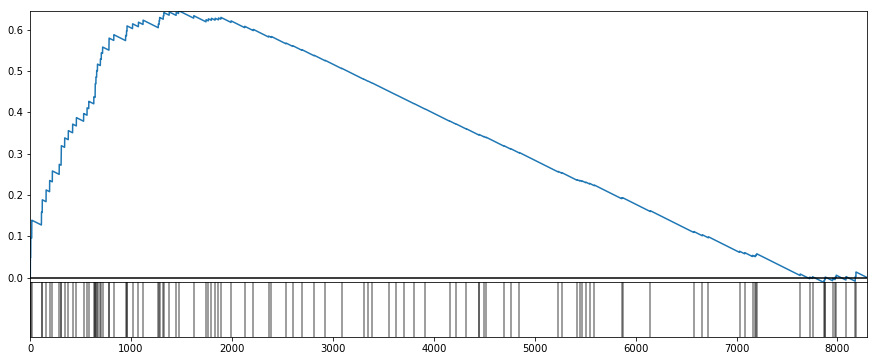

R-HSA-2730905
Median : -0.14198792553965972


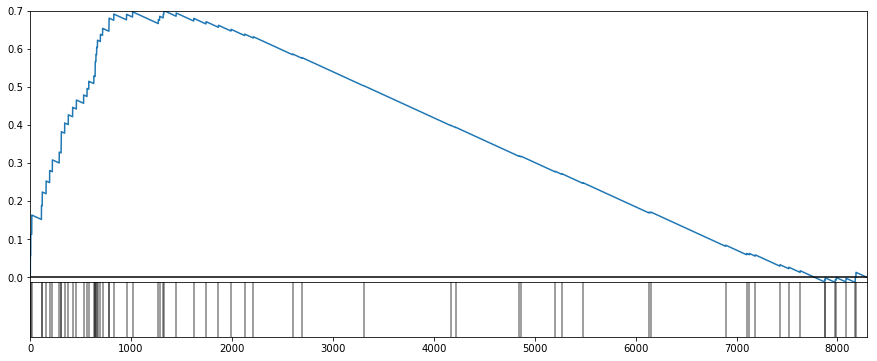

R-HSA-2029485
Median : -0.14198792553965972


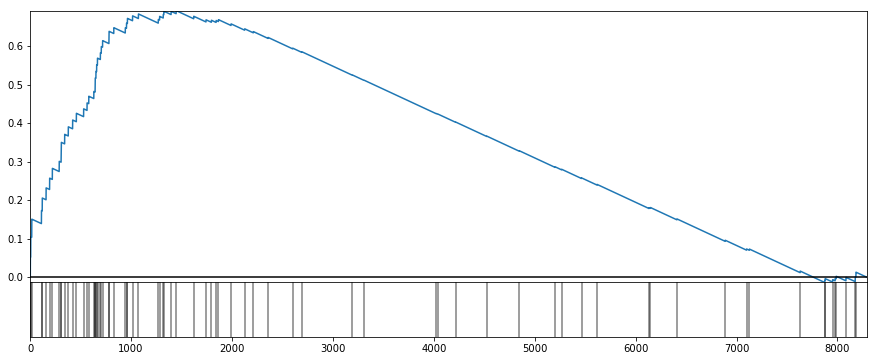

R-HSA-2168880
Median : -0.14198792553965972


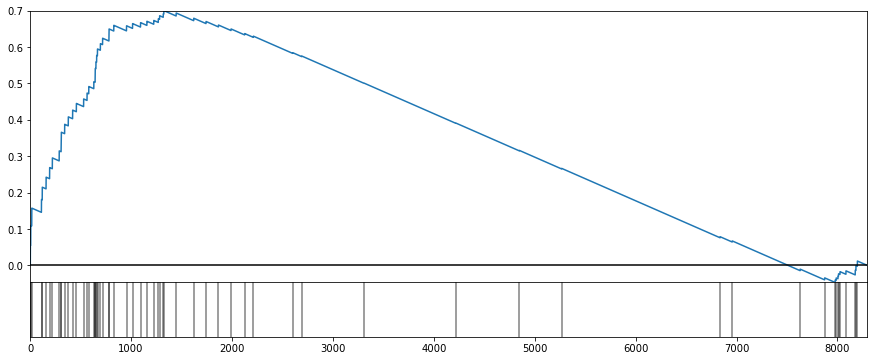

In [13]:
path = "H3K27ac/tss[-4000..4000]_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-373076
Median : -0.09586810185727004


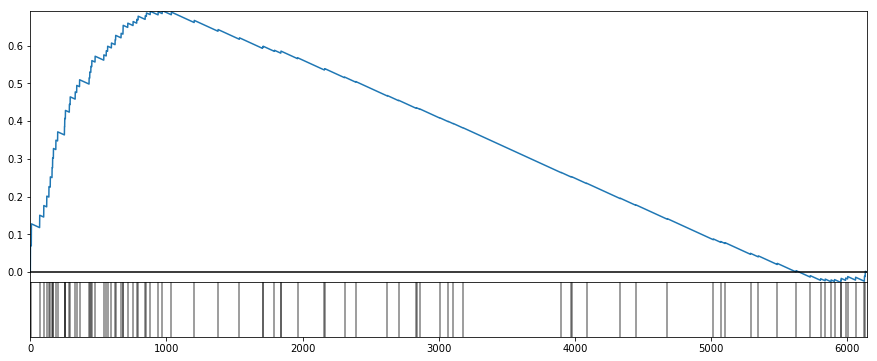

R-HSA-500792
Median : -0.09586810185727004


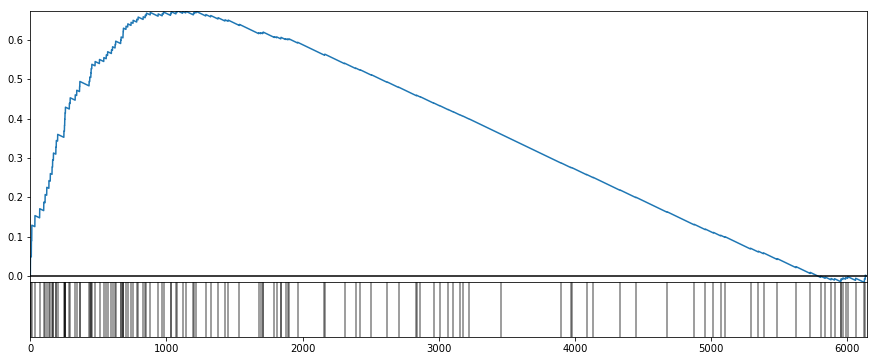

In [14]:
path = "H3K27ac/ucsc_cpgIslandExt.hg19_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-2299718
Median : 0.10727562233789036


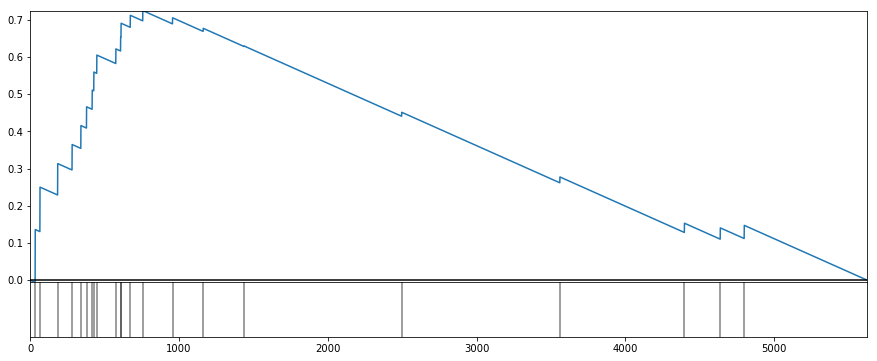

R-HSA-427389
Median : 0.10727562233789036


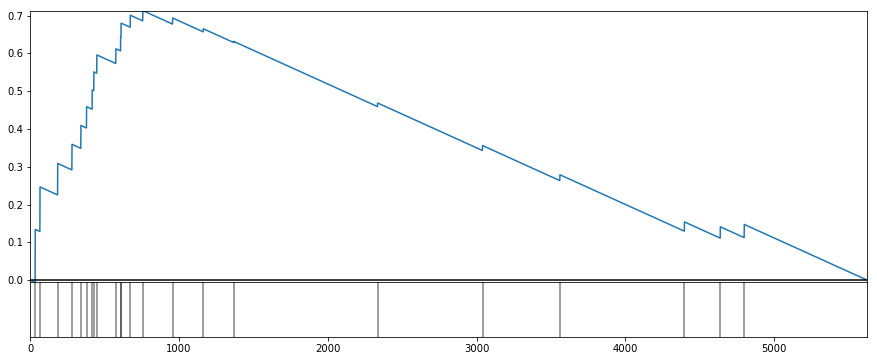

R-HSA-912446
Median : 0.10727562233789036


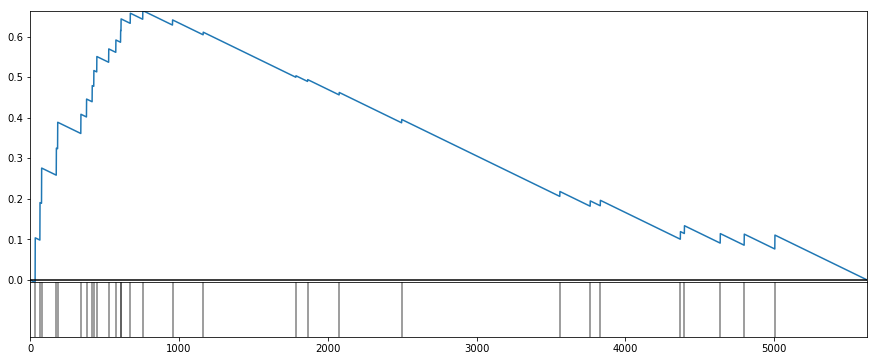

R-HSA-68875
Median : 0.10727562233789036


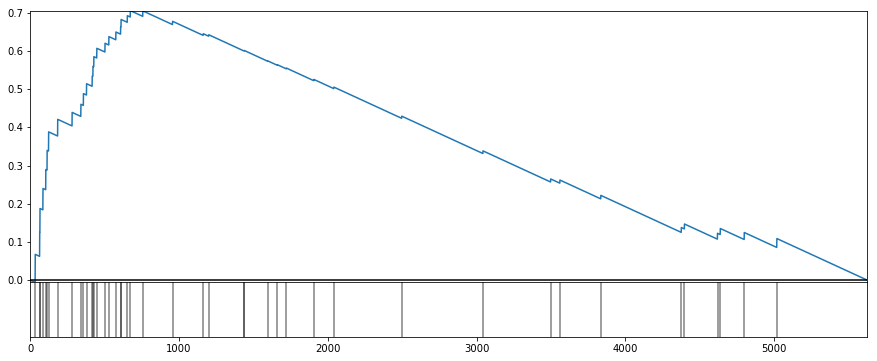

R-HSA-381753
Median : 0.10727562233789036


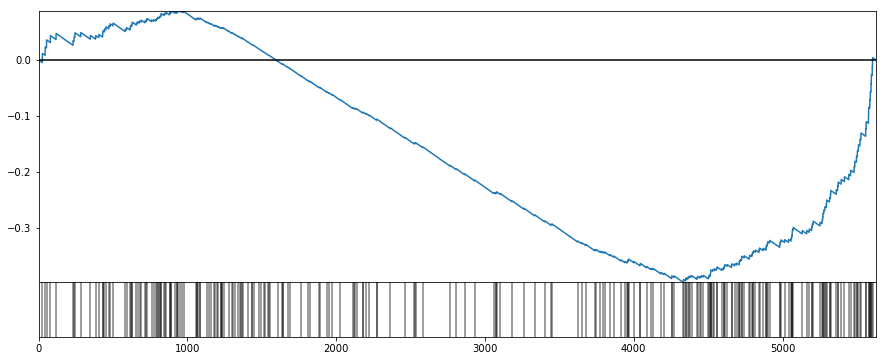

R-HSA-171306
Median : 0.10727562233789036


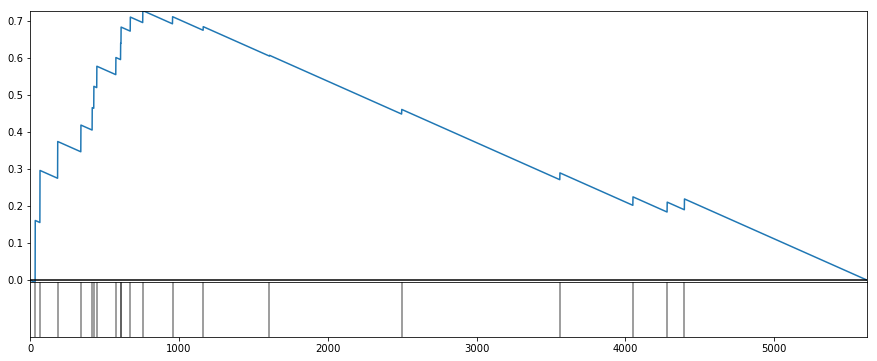

R-HSA-72203
Median : 0.10727562233789036


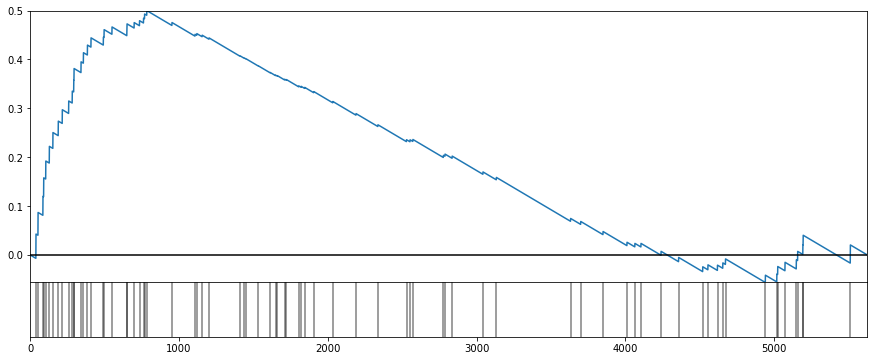

R-HSA-427359
Median : 0.10727562233789036


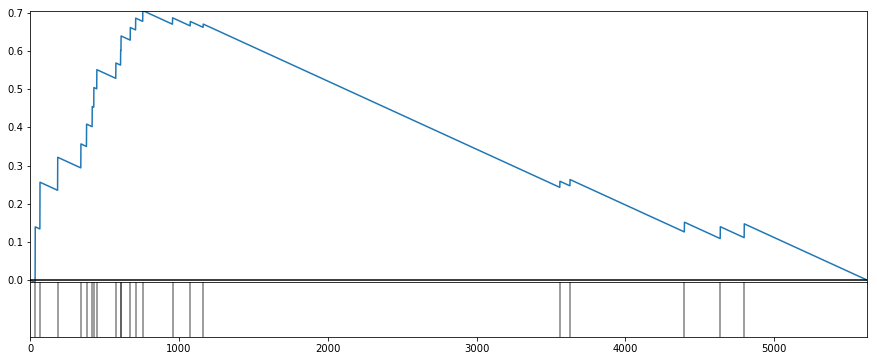

R-HSA-157579
Median : 0.10727562233789036


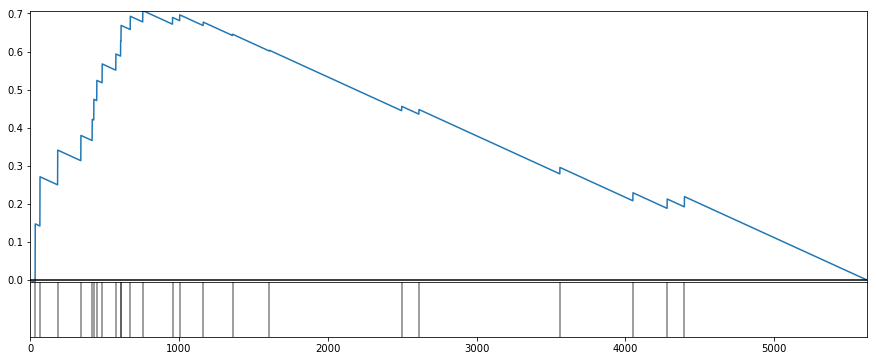

In [15]:
path = "H3K27me3/tss[-4000..4000]_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-173623
Median : 0.02087327564413077


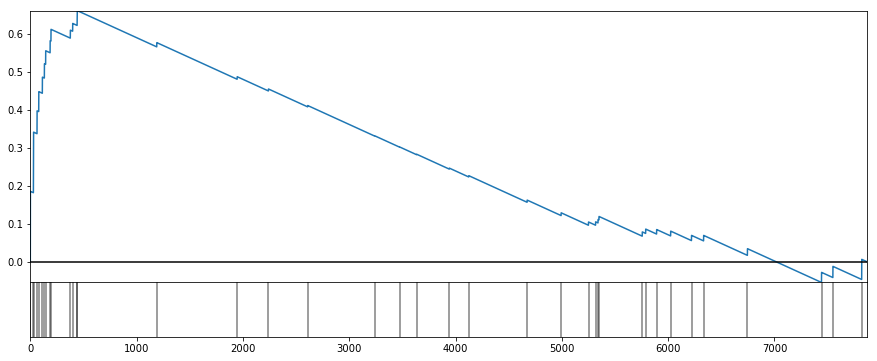

R-HSA-1474244
Median : 0.02087327564413077


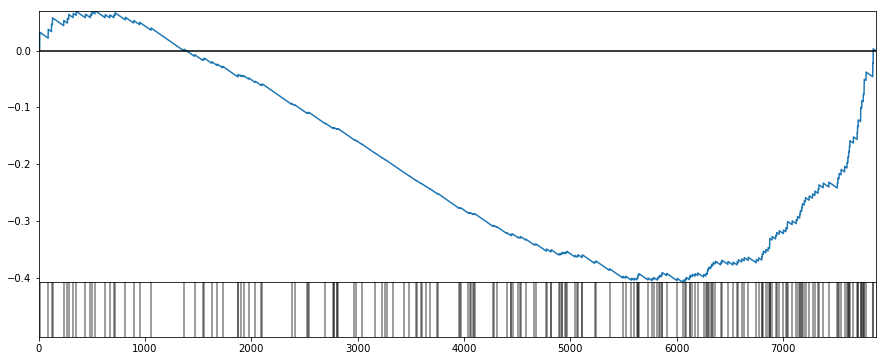

R-HSA-2871809
Median : 0.02087327564413077


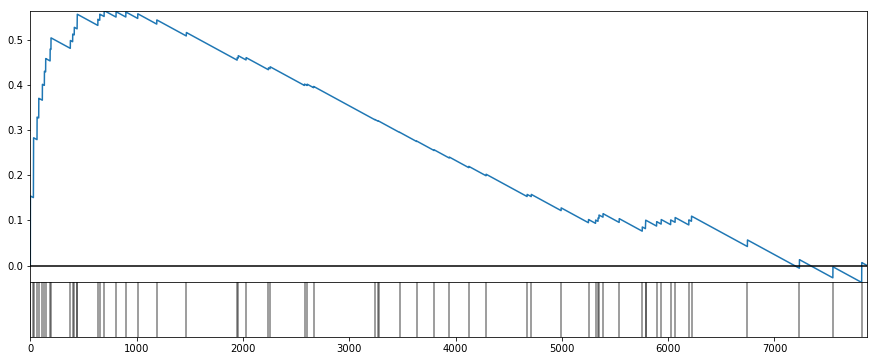

R-HSA-2871796
Median : 0.02087327564413077


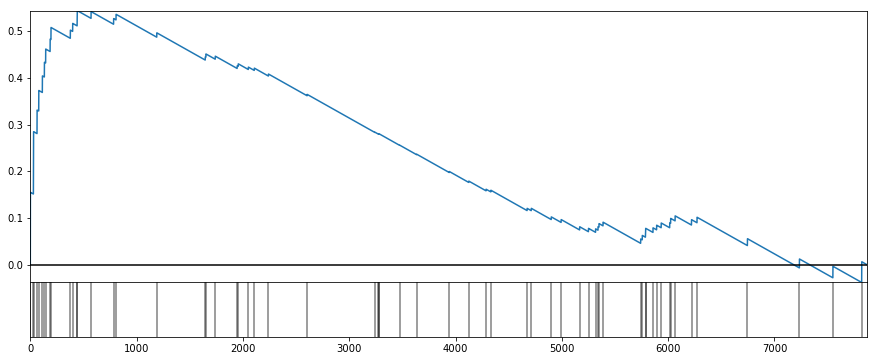

R-HSA-2029481
Median : 0.02087327564413077


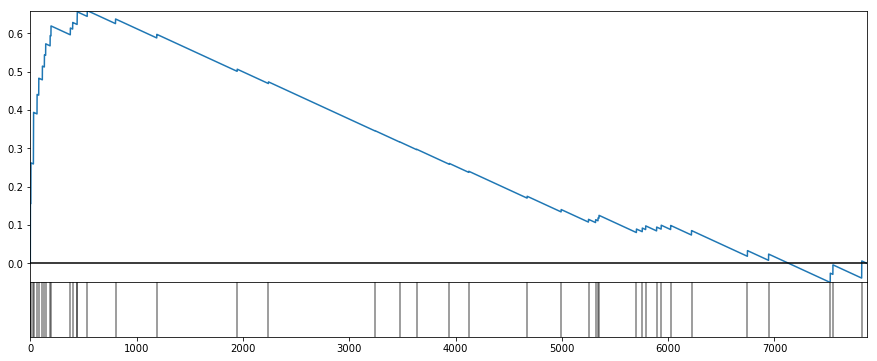

R-HSA-2029480
Median : 0.02087327564413077


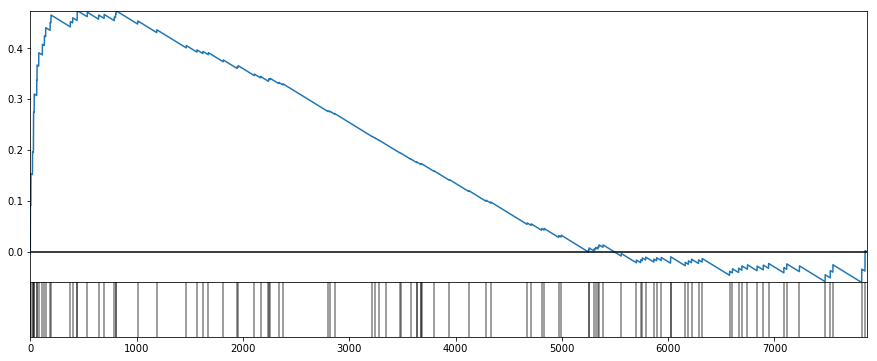

R-HSA-198933
Median : 0.02087327564413077


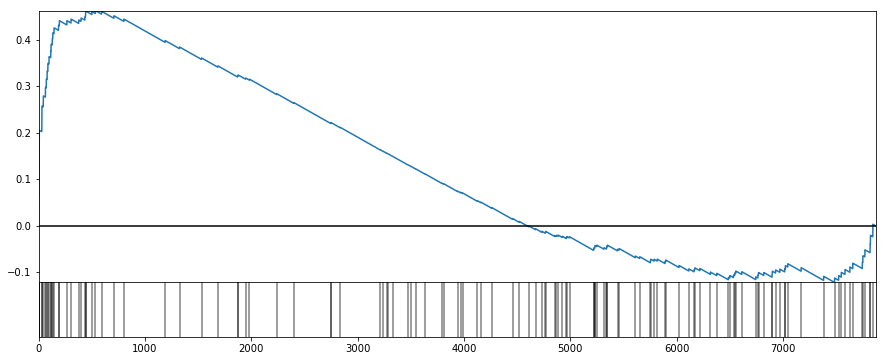

R-HSA-977606
Median : 0.02087327564413077


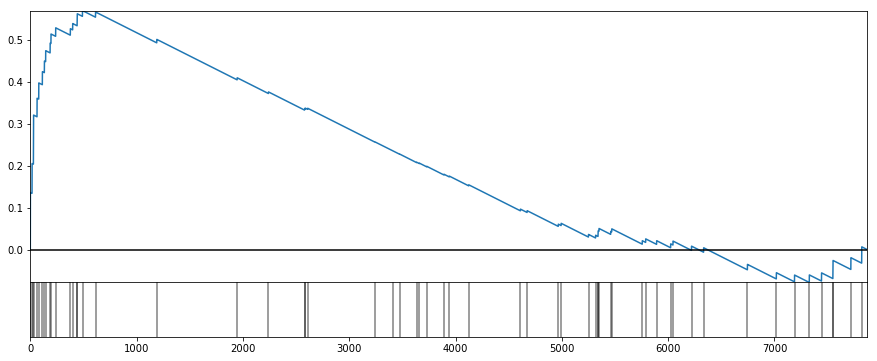

R-HSA-2029482
Median : 0.02087327564413077


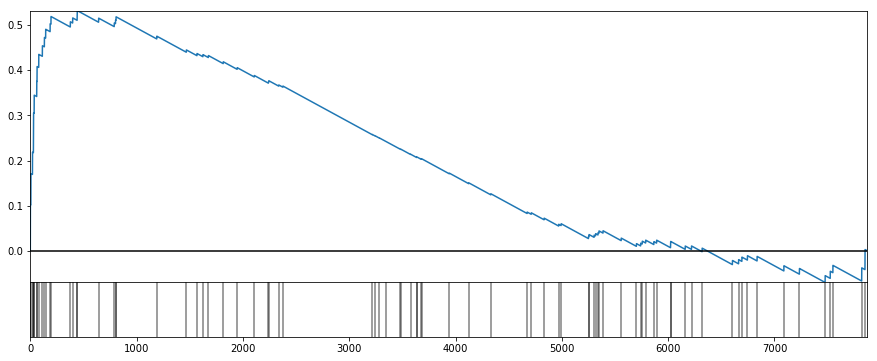

R-HSA-2730905
Median : 0.02087327564413077


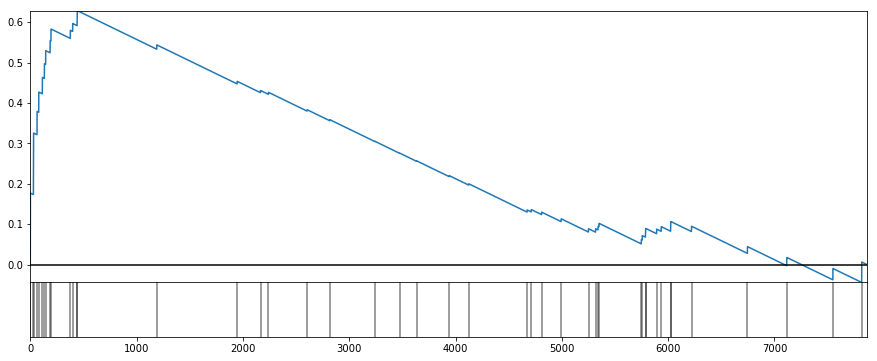

R-HSA-2029485
Median : 0.02087327564413077


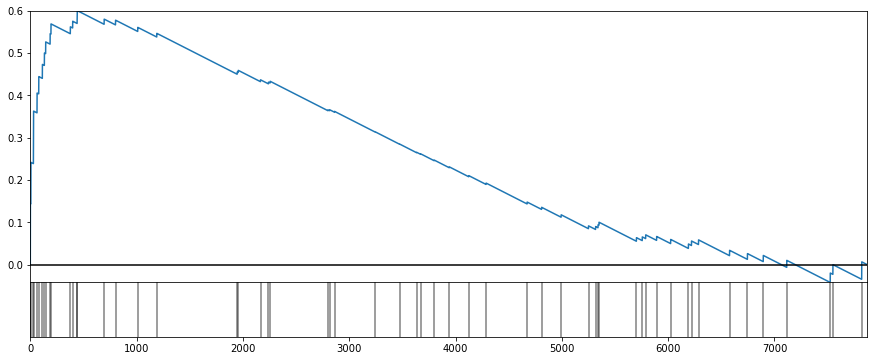

R-HSA-2168880
Median : 0.02087327564413077


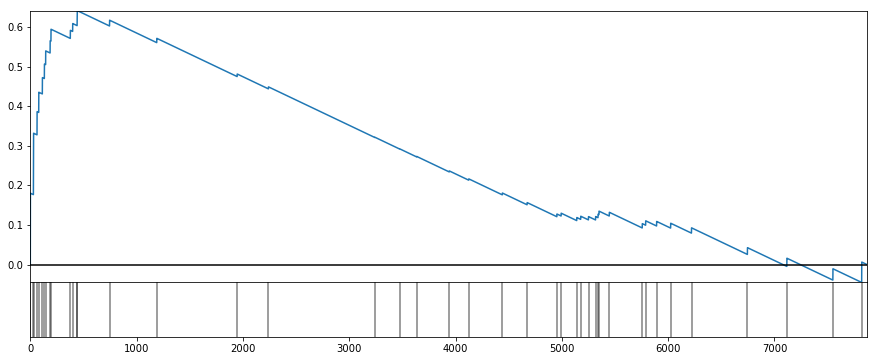

In [19]:
path = "H3K4me1/zinbra_weak_consensus_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-112316
Median : 0.011835748987173884


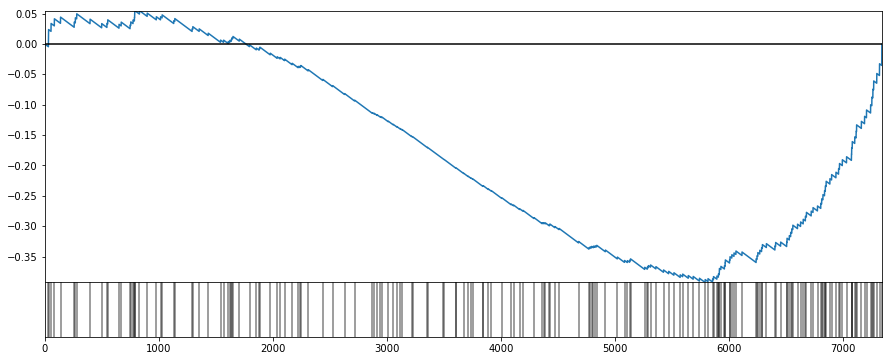

In [20]:
path = "H3K4me1/zinbra_median_consensus_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-1368108
Median : 0.15114923854045387


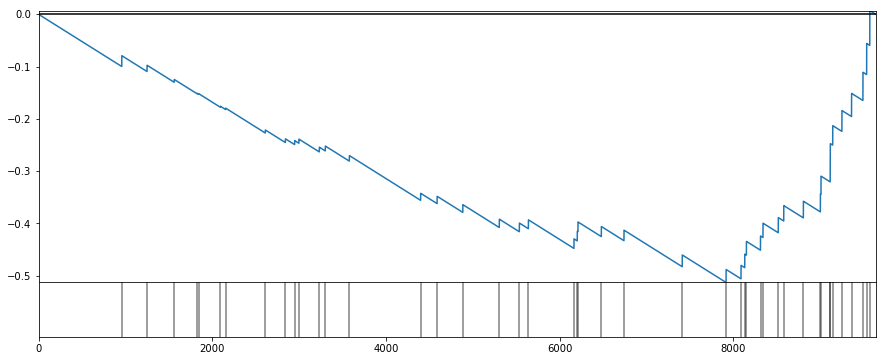

R-HSA-400253
Median : 0.15114923854045387


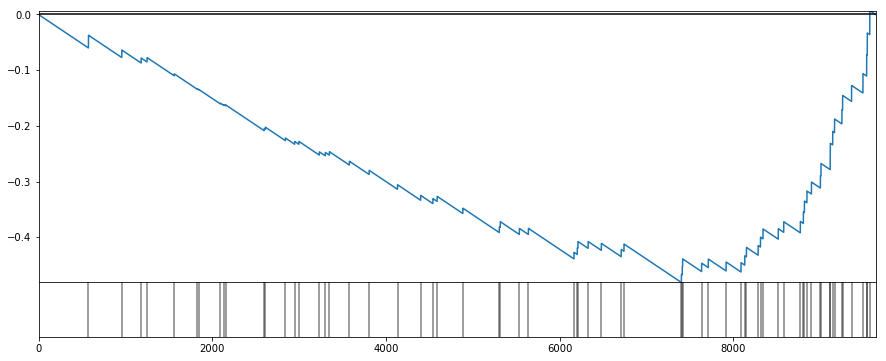

R-HSA-209822
Median : 0.15114923854045387


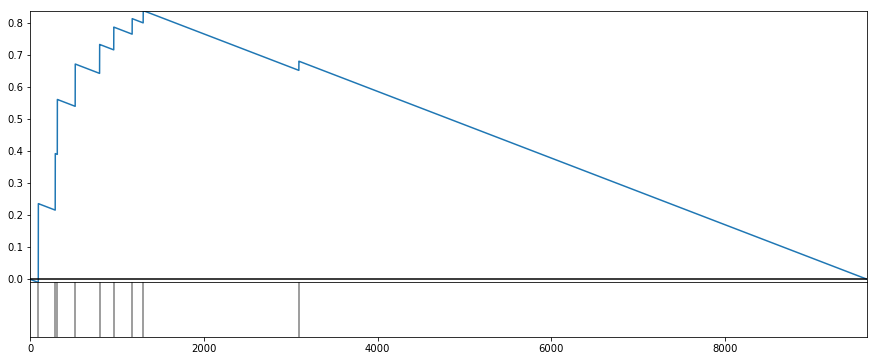

R-HSA-6805567
Median : 0.15114923854045387


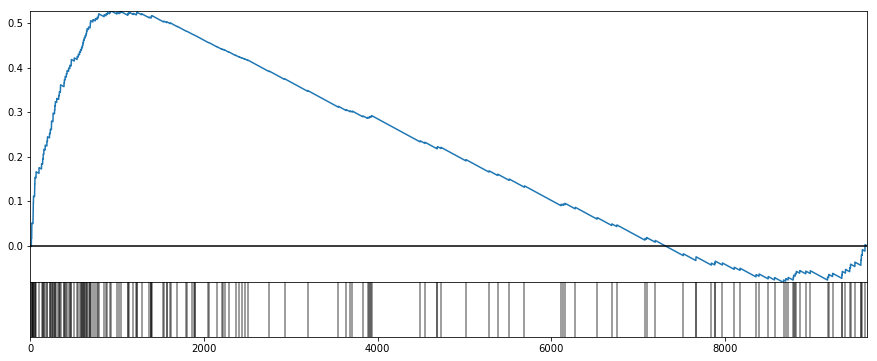

R-HSA-381753
Median : 0.15114923854045387


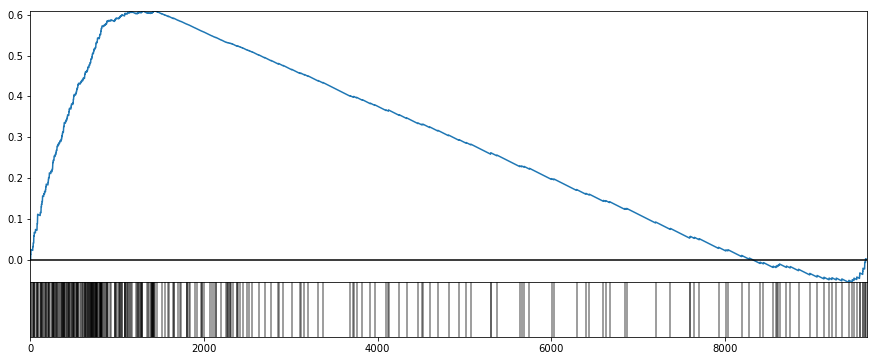

R-HSA-209952
Median : 0.15114923854045387


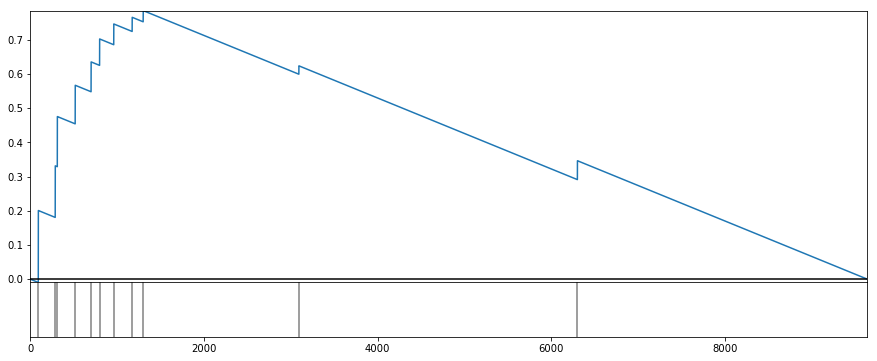

R-HSA-72203
Median : 0.15114923854045387


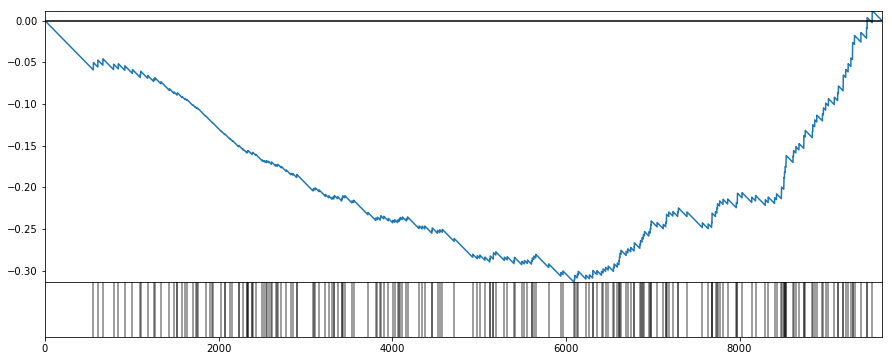

In [21]:
path = "H3K4me1/hg19_1000_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-373076
Median : -0.004994773295819225


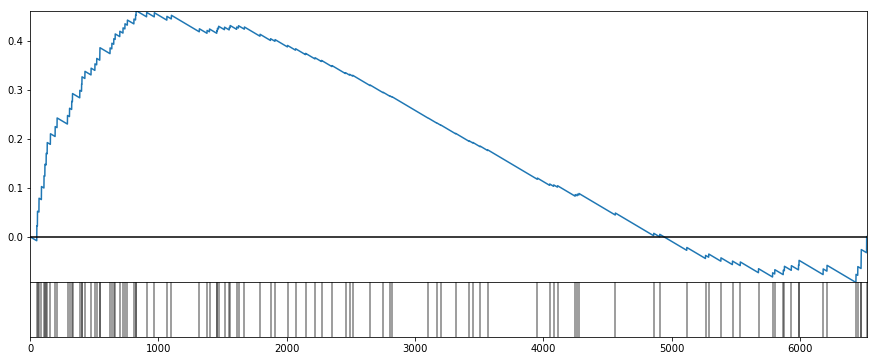

R-HSA-373080
Median : -0.004994773295819225


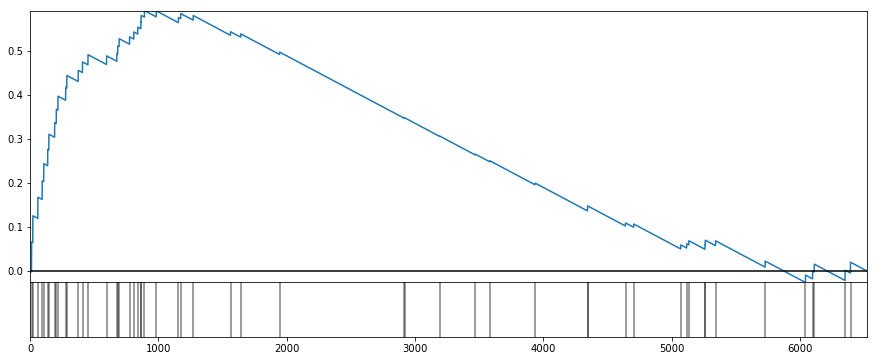

R-HSA-1474290
Median : -0.004994773295819225


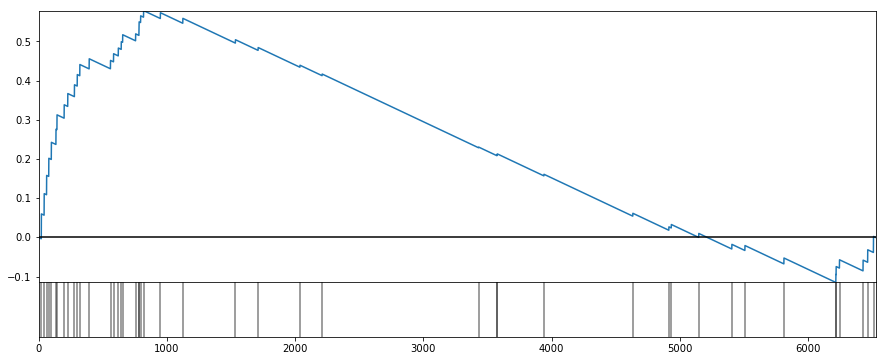

R-HSA-1474244
Median : -0.004994773295819225


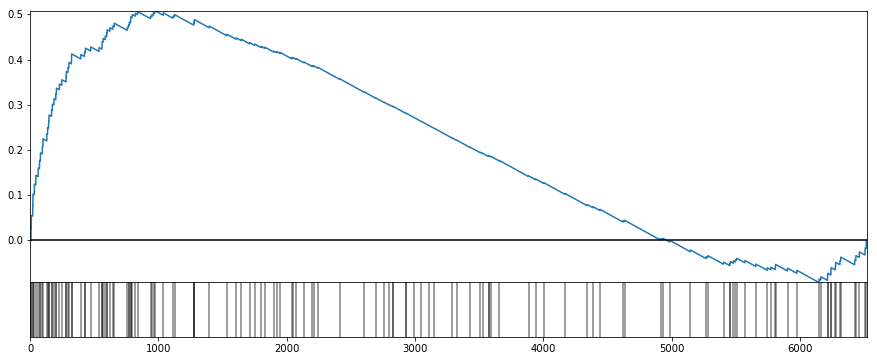

R-HSA-500792
Median : -0.004994773295819225


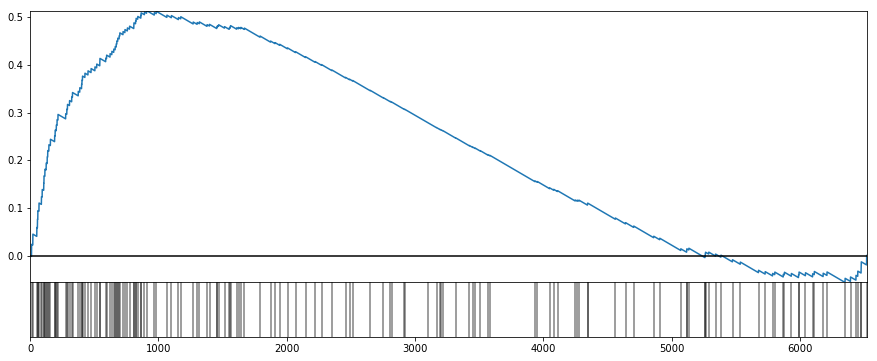

R-HSA-112316
Median : -0.004994773295819225


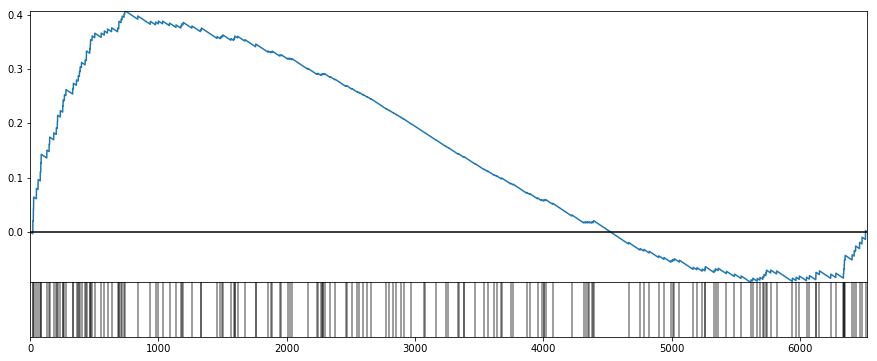

R-HSA-6798695
Median : -0.004994773295819225


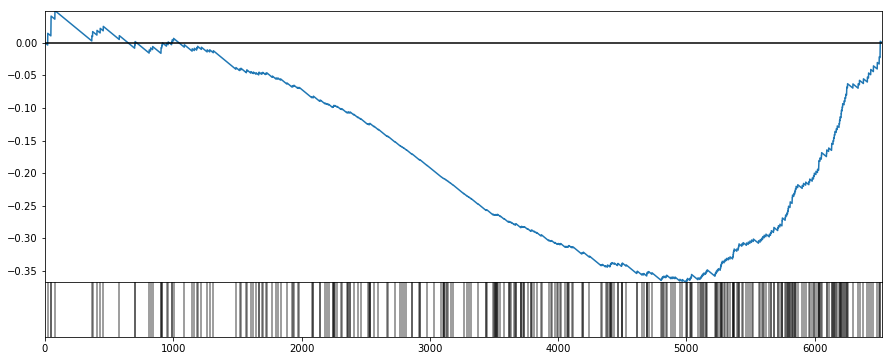

R-HSA-1296071
Median : -0.004994773295819225


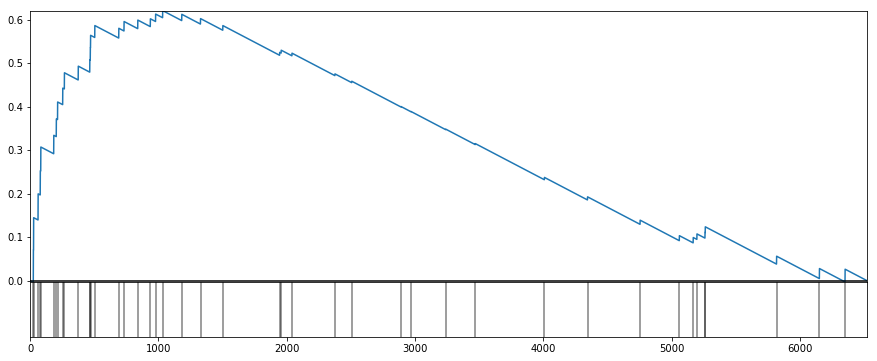

R-HSA-1296072
Median : -0.004994773295819225


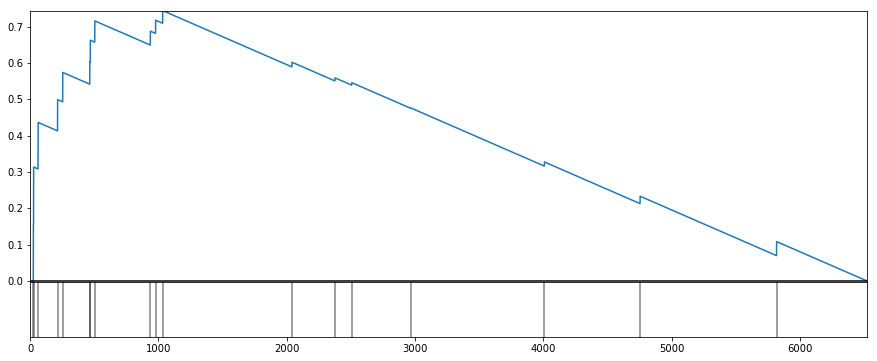

In [22]:
path = "H3K4me3/zinbra_median_consensus_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)

R-HSA-6805567
Median : 0.31056829434038463


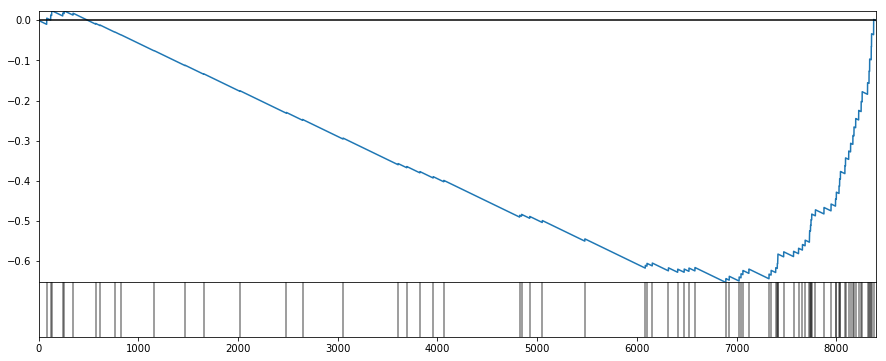

R-HSA-381753
Median : 0.31056829434038463


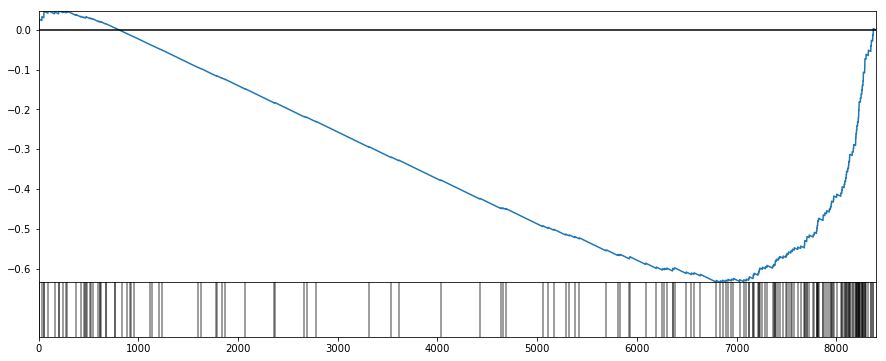

In [24]:
path = "H3K36me3/tss[-4000..4000]_diffbind_tmm_minus_full_tss_10000/"
for pathway in find_pathways(path):
    print(pathway)    
    do_plot(path + pathway)